In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.datasets import make_regression

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

### K Nearset Neighbors for Regression

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5)
knnreg.fit(X_train, y_train)

knnreg.score(X_test, y_test) # returns r squared value

0.4246800858234563

### Least-Squares Regression

0.4915961593493031

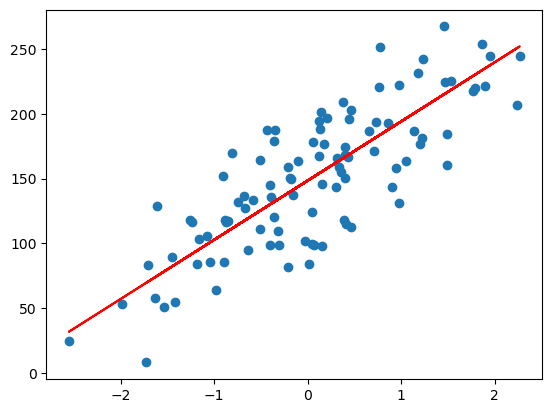

In [37]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

b = linreg.intercept_
m = linreg.coef_

plt.scatter(X_R1, y_R1)
plt.plot(X_R1, m * X_R1 + b, c = 'r')

linreg.score(X_test, y_test) # returns r squared value

### Ridge, Lasso, and Polynomial Regression

In [38]:
# Ridge
from sklearn.linear_model import Ridge

from adspy_shared_utilities import load_crime_dataset
(X_crime, y_crime) = load_crime_dataset()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

linridge = Ridge(alpha = 20.0)
linridge.fit(X_train, y_train)

b = linridge.intercept_
M = linridge.coef_

linridge.score(X_test, y_test)

0.49404901459666717

In [39]:
# Ridge with Min max scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# using scaled x with ridge
linridge = Ridge(alpha = 20.0)
linridge.fit(X_train_scaled, y_train)

linridge.score(X_test_scaled, y_test)

0.5986066019999294

In [40]:
# Lasso regression

from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000)
linlasso.fit(X_train_scaled, y_train)

linlasso.score(X_test_scaled, y_test)

0.6237725857015401

In [41]:
# Polynomial regression

# starting with degree 1 lin reg
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.score(X_test, y_test))

# degree 2 lin reg
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.score(X_test, y_test))

# degree 2 with ridge
linridge = Ridge()
linridge.fit(X_train, y_train)

print(linridge.score(X_test, y_test))

0.7221339576925416
0.8046437550509976
0.8251115209759519


### Logisitic Regression

In [42]:
# e.g.,
# x axis is hours studied
# y = 0 means failed exam
# y = 1 means passed exam

Text(8.7, 6.5, 'not an apple')

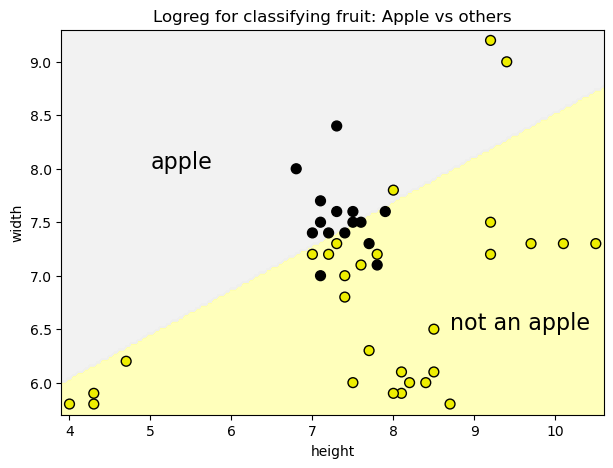

In [43]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, axs = plt.subplots(1, 1, figsize = (7, 5))

fruits = pd.read_table('assets/fruit_data_with_colors.txt')

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

y_fruits_apple = y_fruits_2d == 1

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.values, y_fruits_apple.values, random_state = 0)

logreg = LogisticRegression(C=100)
logreg.fit(X_train, y_train)

plot_class_regions_for_classifier_subplot(logreg, X_train, y_train, None, None, "Logreg for classifying fruit: Apple vs others", axs)

axs.set_xlabel("height")
axs.set_ylabel("width")

axs.text(5, 8, "apple", fontsize = 16)
axs.text(8.7, 6.5, "not an apple", fontsize = 16)

### Kernalized Support Vector Machines

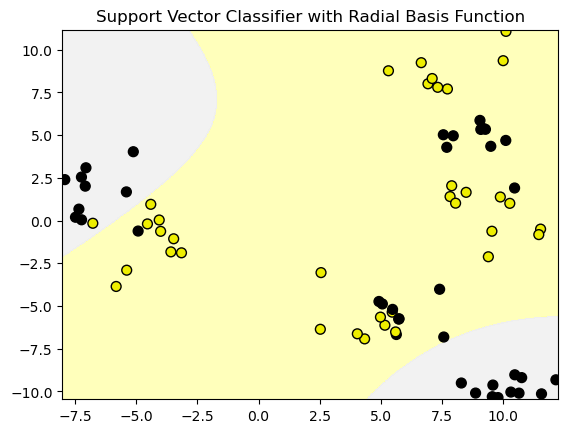

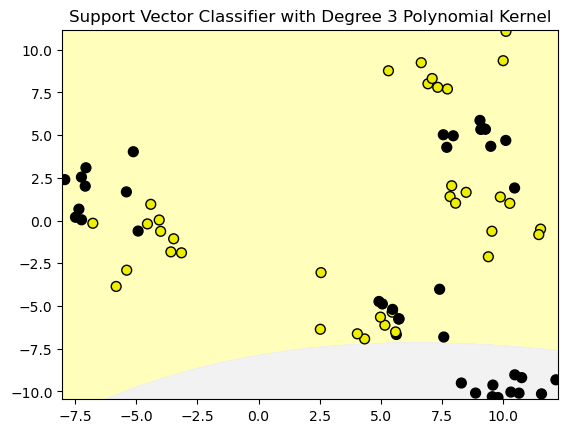

In [44]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf = SVC()
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, None, None, 'Support Vector Classifier with Radial Basis Function')

clf = SVC(kernel = 'poly', degree = 3)
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, None, None, 'Support Vector Classifier with Degree 3 Polynomial Kernel')

### Cross-validation

In [45]:
# runs multiple train-test-splits and averages score

In [46]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)

X = X_fruits_2d
y = y_fruits_2d

cv_scores = cross_val_score(clf, X, y)

print("Scores: ", cv_scores)

print("Mean score: ", np.mean(cv_scores))

Scores:  [0.75       0.75       0.83333333 0.83333333 0.81818182]
Mean score:  0.7969696969696971


### Decision Trees

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.tree import DecisionTreeClassifier as DTC
from adspy_shared_utilities import plot_decision_tree

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

clf = DTC()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9736842105263158


In [48]:
# pruning via limiting max depth
clf3 = DTC(max_depth = 3)
clf3.fit(X_train, y_train)

print(clf3.score(X_train, y_train))
print(clf3.score(X_test, y_test))

0.9821428571428571
0.9736842105263158


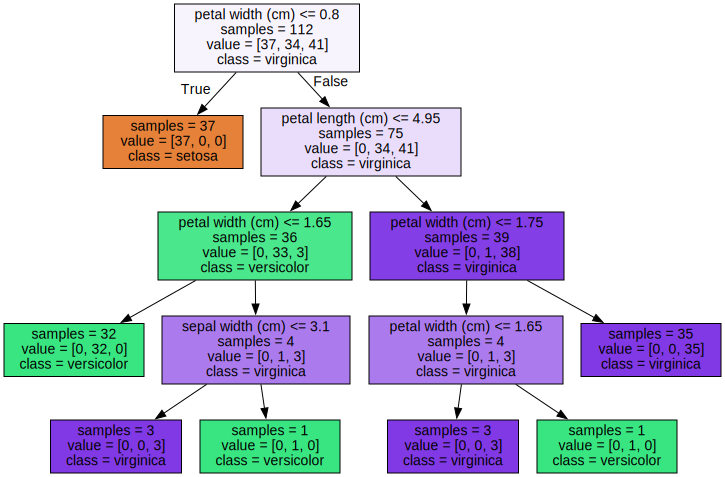

In [49]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

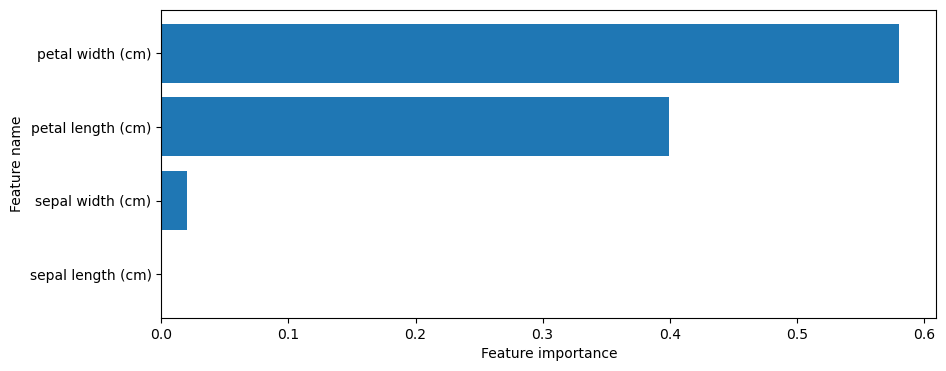

In [52]:
# Feature Importance
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4))

plot_feature_importances(clf, iris.feature_names)